In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Reading and head data
df = pd.read_excel('Crude Oil Prices Daily.xlsx')
df = df.fillna(df.bfill())
history = [x for x in df['Closing Value']]
print(df.dtypes)
df.head()

Date             datetime64[ns]
Closing Value           float64
dtype: object


,Date,Closing Value
0,1986-01-02,25.56
1,1986-01-03,26.00
2,1986-01-06,26.53
3,1986-01-07,25.85
4,1986-01-08,25.87


In [8]:
df = df.set_index('Date')
train = df[:901]
test = df[900:1000]

# Exponential_smoothing

In [9]:
y_hat_avg = test.copy()
forecasted_param = "Closing Value"

In [10]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error


In [11]:
fit2 = SimpleExpSmoothing(np.asarray(train)).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
print(fit2.predict())

[20.44499212]


RMSE: 1.2004581785231487


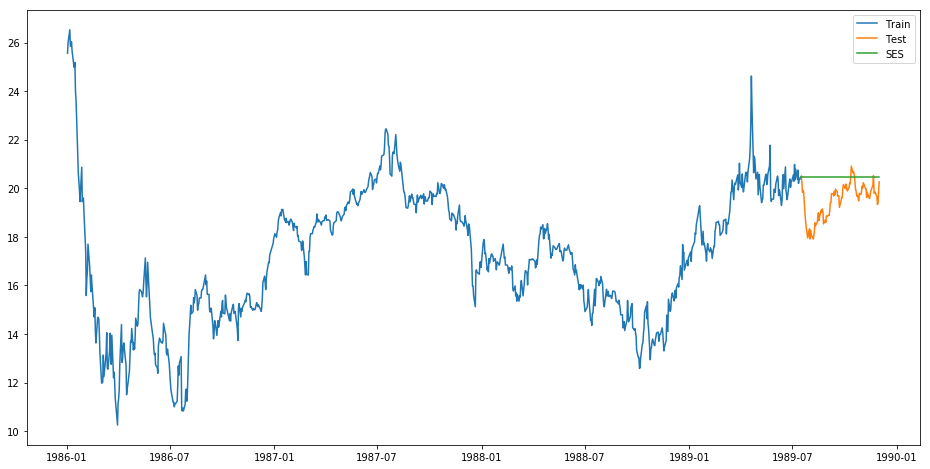

In [12]:
plt.figure(figsize=(16,8))
plt.plot(train['Closing Value'], label='Train')
plt.plot(test['Closing Value'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')   
rms = np.sqrt(mean_squared_error(test[forecasted_param], y_hat_avg.SES))
print("RMSE: " + str(rms))

# Holt's method

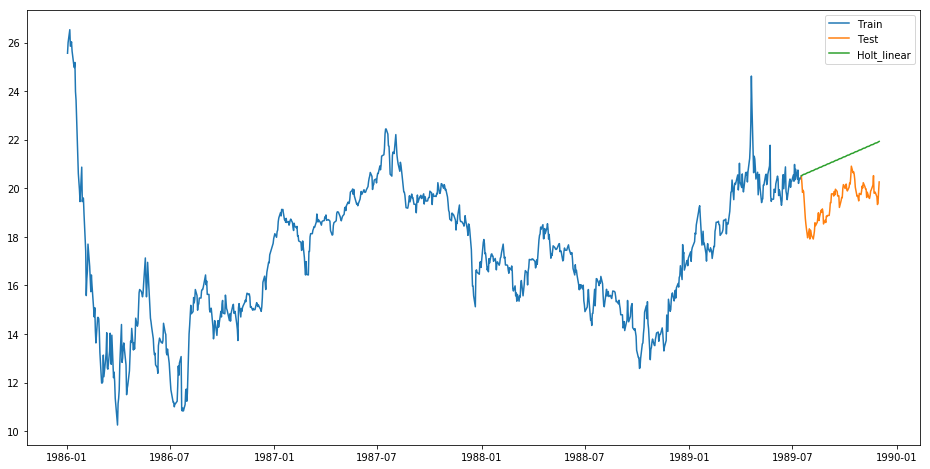

RMSE: 1.826430175976652


In [13]:
fit1 = Holt(np.asarray(train['Closing Value'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train['Closing Value'], label='Train')
plt.plot(test['Closing Value'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()
rms = np.sqrt(mean_squared_error(test['Closing Value'], y_hat_avg.Holt_linear))
print("RMSE: " + str(rms))

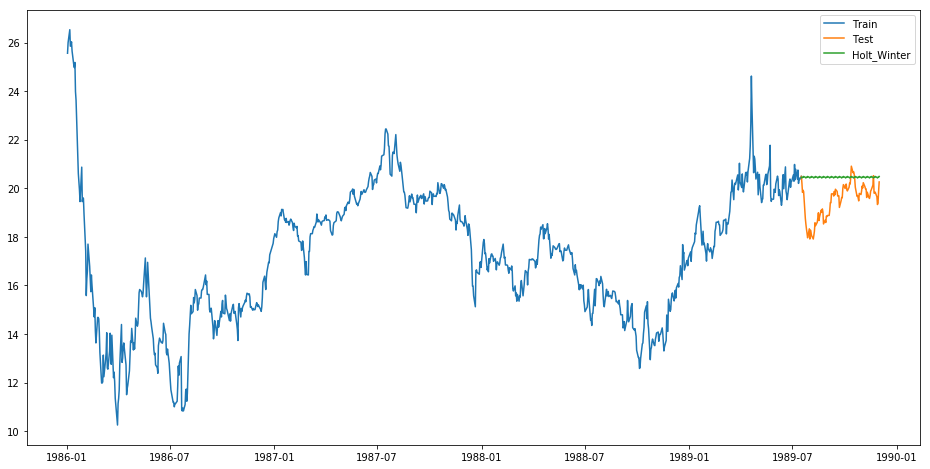

RMSE: 1.2068139468576524


In [14]:
fit1 = ExponentialSmoothing(np.asarray(train['Closing Value']) ,seasonal_periods=5 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Closing Value'], label='Train')
plt.plot(test['Closing Value'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()
rms = np.sqrt(mean_squared_error(test['Closing Value'], y_hat_avg.Holt_Winter))
print("RMSE: " + str(rms))

# ARIMA

In [15]:
from statsmodels.tsa.arima_model import ARIMA


In [16]:
model = ARIMA(df['Closing Value'], order=(3,2,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/home/yarrdopanas/miniconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/home/yarrdopanas/miniconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:       D2.Closing Value   No. Observations:                 8221
Model:                 ARIMA(3, 2, 0)   Log Likelihood              -13644.565
Method:                       css-mle   S.D. of innovations              1.272
Date:                Mon, 10 Sep 2018   AIC                          27299.129
Time:                        12:19:37   BIC                          27334.202
Sample:                             2   HQIC                         27311.118
                                                                              
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -3.317e-06      0.005     -0.001      1.000      -0.010       0.010
ar.L1.D2.Closing Value    -0.7939      0.011    -74.822      0.000      -0.815      -0.773
ar.L

In [24]:
# history = [x for x in train]
predictions = list()
# start=start_index, end=end_index
for t in range(len(test)):
    model = ARIMA(history, order=(3,2,1))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    y = output[0]
    predictions.append(y)
    obs = test['Closing Value'][t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (y, obs))
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

predicted=20.221229, expected=20.490000
predicted=20.462736, expected=20.210000
predicted=20.202408, expected=19.830000
predicted=19.835226, expected=19.920000
predicted=19.906370, expected=19.860000
predicted=19.839626, expected=18.760000
predicted=18.781792, expected=18.520000
predicted=18.534397, expected=18.320000
predicted=18.303525, expected=18.150000
predicted=18.140615, expected=17.960000
predicted=17.950952, expected=18.330000
predicted=18.303167, expected=17.910000


/home/yarrdopanas/miniconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=17.894461, expected=18.280000
predicted=18.263966, expected=18.180000
predicted=18.153723, expected=18.050000
predicted=18.043471, expected=17.910000
predicted=17.899447, expected=18.060000
predicted=18.039723, expected=18.230000
predicted=18.202579, expected=18.580000
predicted=18.549354, expected=18.460000


/home/yarrdopanas/miniconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=18.441239, expected=18.600000
predicted=18.584967, expected=18.780000
predicted=18.752973, expected=18.990000
predicted=18.963933, expected=18.670000
predicted=18.661280, expected=18.820000
predicted=18.807733, expected=19.100000


/home/yarrdopanas/miniconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=19.067458, expected=19.010000
predicted=18.991892, expected=19.150000
predicted=19.133827, expected=19.020000
predicted=19.003820, expected=18.530000
predicted=18.534151, expected=18.690000
predicted=18.677546, expected=18.590000
predicted=18.567934, expected=18.850000
predicted=18.828671, expected=18.830000


/home/yarrdopanas/miniconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=18.807358, expected=18.880000
predicted=18.865147, expected=18.880000


/home/yarrdopanas/miniconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=18.862168, expected=19.080000


/home/yarrdopanas/miniconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=19.057421, expected=19.410000
predicted=19.378248, expected=19.400000


/home/yarrdopanas/miniconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=19.378851, expected=19.770000


/home/yarrdopanas/miniconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=19.745270, expected=19.770000
predicted=19.745630, expected=19.680000
predicted=19.671233, expected=19.870000
predicted=19.849645, expected=19.730000
predicted=19.713680, expected=19.960000
predicted=19.941483, expected=19.870000
predicted=19.850428, expected=19.680000
predicted=19.675055, expected=19.680000
predicted=19.667209, expected=19.690000


/home/yarrdopanas/miniconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=19.671597, expected=19.210000
predicted=19.209371, expected=19.490000
predicted=19.475238, expected=19.620000
predicted=19.588002, expected=19.610000
predicted=19.594339, expected=19.990000
predicted=19.962980, expected=20.150000
predicted=20.120291, expected=19.990000
predicted=19.980568, expected=20.150000
predicted=20.134093, expected=20.170000
predicted=20.148300, expected=19.950000
predicted=19.942752, expected=19.890000
predicted=19.881205, expected=20.040000
predicted=20.018135, expected=20.210000
predicted=20.184593, expected=20.180000
predicted=20.163328, expected=20.490000
predicted=20.466423, expected=20.910000


/home/yarrdopanas/miniconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=20.873309, expected=20.640000
predicted=20.627518, expected=20.680000
predicted=20.673633, expected=20.580000
predicted=20.563961, expected=20.370000
predicted=20.364056, expected=20.040000
predicted=20.038962, expected=19.670000
predicted=19.671568, expected=19.700000
predicted=19.687149, expected=19.600000
predicted=19.582748, expected=19.480000
predicted=19.470557, expected=19.790000
predicted=19.765315, expected=19.740000
predicted=19.717592, expected=19.880000
predicted=19.863888, expected=20.090000


/home/yarrdopanas/miniconda3/lib/python3.6/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/yarrdopanas/miniconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=20.063583, expected=20.010000
predicted=19.994079, expected=20.230000
predicted=20.210985, expected=20.060000
predicted=20.044501, expected=19.970000
predicted=19.963355, expected=19.970000


/home/yarrdopanas/miniconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=19.954412, expected=19.620000
predicted=19.614825, expected=19.840000
predicted=19.824559, expected=19.620000
predicted=19.602824, expected=19.580000
predicted=19.572615, expected=19.690000
predicted=19.668964, expected=19.880000
predicted=19.854964, expected=19.930000
predicted=19.909515, expected=20.130000


/home/yarrdopanas/miniconda3/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=20.108540, expected=20.520000
predicted=20.487557, expected=19.800000
predicted=19.801790, expected=19.800000
predicted=19.804333, expected=19.840000
predicted=19.814568, expected=19.650000
predicted=19.639601, expected=19.330000
predicted=19.329338, expected=19.400000
predicted=19.386893, expected=19.870000
predicted=19.833456, expected=20.260000


ValueError: view limit minimum -36321.85 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 432x288 with 1 Axes>

In [19]:
error = np.sqrt(mean_squared_error(test['Closing Value'], predictions))
print('Test RMSE: %.3f' % error)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

# GARCH

In [21]:
from arch import arch_model

In [22]:
model=arch_model(history, vol='Garch', p=3, o=0, q=1, dist='Normal')
results=model.fit()
print(results.summary())

Iteration:      1,   Func. Count:      8,   Neg. LLF: 37428.34252726573
Iteration:      2,   Func. Count:     17,   Neg. LLF: 35880.22705618614
Iteration:      3,   Func. Count:     27,   Neg. LLF: 34139.67785081667
Iteration:      4,   Func. Count:     37,   Neg. LLF: 33594.894544060335
Iteration:      5,   Func. Count:     45,   Neg. LLF: 31246.43187061166
Iteration:      6,   Func. Count:     61,   Neg. LLF: 31191.549313126558
Iteration:      7,   Func. Count:     70,   Neg. LLF: 30207.047340062032
Iteration:      8,   Func. Count:     78,   Neg. LLF: 30125.84349153068
Iteration:      9,   Func. Count:     88,   Neg. LLF: 30122.716349225222
Iteration:     10,   Func. Count:     96,   Neg. LLF: 30120.764532643258
Iteration:     11,   Func. Count:    106,   Neg. LLF: 30118.650154500785
Iteration:     12,   Func. Count:    122,   Neg. LLF: 30118.56971348089
Iteration:     13,   Func. Count:    139,   Neg. LLF: 30118.54666605635
Iteration:     14,   Func. Count:    155,   Neg. LLF: 3011

In [23]:
forecasts = results.forecast(horizon=5)
print(forecasts.variance.dropna())

           h.1       h.2       h.3       h.4       h.5
8322  0.346505  0.415387  0.494552  0.573108  0.651154
